# Analise Exploratória Terremotos

## Introdução

O estudo e monitoramento de atividades sísmicas ao redor do mundo são de grande importância pois permitem entender melhor os processos que ocorrem na Terra, prever e preparar-se para terremotos e tsunamis, reduzindo assim o risco de perdas humanas e materiais. Além disso, o monitoramento sísmico ajuda a identificar áreas de alta atividade sísmica, permitindo que governos e autoridades tomem medidas de prevenção e preparação, como a criação de planos de emergência e a implementação de construções resistentes a terremotos. Adicionalmente, o estudo das atividades sísmicas também contribui para o conhecimento da estrutura interna da Terra, ajudando a entender a formação de montanhas, a criação de oceanos e a evolução da Terra ao longo do tempo.

Os principais motivos de abalos sísmicos incluem:

* Movimento de placas tectônicas: a interação entre as placas que compõem a crosta terrestre pode causar abalos sísmicos quando elas se movem ou se chocam;
* Libertação de energia: quando a energia acumulada na crosta terrestre é liberada devido ao movimento das placas tectônicas, pode ocorrer um abalo sísmico;
* Vulcânica: a atividade vulcânica pode causar abalos sísmicos devido ao movimento de magma e gases dentro da Terra;
* Injeção de fluidos: a injeção de fluidos na crosta terrestre, como água ou gás, pode causar abalos sísmicos;
* Deslizamentos e colapsos: deslizamentos de terra, colapsos de cavernas ou outros eventos que envolvem o movimento de rochas e solo podem causar abalos sísmicos;
* Explosões: explosões nucleares ou químicas podem causar abalos sísmicos;
* Meteoritos: impactos de meteoritos podem causar abalos sísmicos.

É importante notar que dentre os principias motivos, o maior volume dos abalos sísmicos é causada pelo movimento de placas tectônicas e pela libertação de energia associada a isso.

## Objetivo

Realizar análise exploratória no dataset de atividades sísmicas registradas ao redor do mundo entre os anos de 1985 e 2021 com magnitude >= 5.5 (escala Richter), buscando evidenciar padrões e aprofundar o entendimento sobre o tema. A base utilizada foi obtida a partir do site do serviço geológico dos Estados Unidos (https://www.usgs.gov/)

## Importação das bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Carregamento da base e edição de campos para utilização futura

In [2]:
df_sismos = pd.read_csv('./database/earthquakes_1985-2021.csv', sep=',')
df_sismos['time'] = pd.to_datetime(df_sismos['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_sismos['dia'] = df_sismos['time'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_sismos['ano'] = df_sismos['time'].apply(lambda x: x.strftime('%Y'))

In [3]:
df_sismos.head()

,time,latitude,longitude,depth(Km),mag,place,type,locationSource,dia,ano
0,2021-12-30 13:13:17.562,-0.0798,125.2498,42.00,5.5,"157 km SSE of Tondano, Indonesia",earthquake,us,2021-12-30,2021
1,2021-12-30 04:58:15.906,-55.8888,-28.0832,41.00,5.7,South Sandwich Islands region,earthquake,us,2021-12-30,2021
2,2021-12-29 18:25:51.962,-7.5482,127.5773,165.49,7.3,"125 km NNE of Lospalos, Timor Leste",earthquake,us,2021-12-29,2021
3,2021-12-29 05:08:09.950,34.8334,25.1386,64.53,5.7,"19 km S of Pýrgos, Greece",earthquake,us,2021-12-29,2021
4,2021-12-29 03:57:32.869,54.6220,170.6514,10.00,5.6,"258 km NW of Attu Station, Alaska",earthquake,us,2021-12-29,2021


## Criação de dataframe com agrupamentos por ano

In [4]:
df_sismos_summary = (df_sismos.groupby('ano')
        .agg({'place': 'count', 'mag':  'mean','depth(Km)': 'mean'})
        .rename(columns={'place':'total','mag':'mag(mean)','depth(Km)':'depth(mean)'})
        .reset_index())
df_sismos_summary

,ano,total,mag(mean),depth(mean)
0,1985,243,5.912469,78.714362
1,1986,485,5.852639,75.418365
2,1987,503,5.901988,73.769243
3,1988,488,5.850410,75.825615
4,1989,476,5.842479,70.790588
5,1990,528,5.858352,81.742225
6,1991,429,5.882284,77.575340
7,1992,529,5.881550,71.319093
8,1993,463,5.889352,74.567596
9,1994,501,5.880579,82.739924


## Estatísticas descritivas do dataframe agrupado por ano

In [5]:
df_sismos_summary.describe()

,total,mag(mean),depth(mean)
count,37.000000,37.000000,37.000000
mean,488.621622,5.875227,70.373965
std,76.440010,0.019308,9.587289
min,243.000000,5.842479,56.005731
25%,444.000000,5.858352,62.575502
50%,483.000000,5.872748,71.319093
75%,529.000000,5.888375,75.825615
max,714.000000,5.913722,96.191007


## Evolução do total de terremotos na série histórica

In [6]:
fig = px.line(df_sismos_summary,
              x=df_sismos_summary['ano'],
              y=df_sismos_summary['total'],        
              )
fig.update_layout(title_text='Total de terremotos por ano',
                      title_x=0.5,
                      xaxis_title='Ano',
                      yaxis_title='Total',
                    )
    
fig.show()

> A média de abalos por ano é de 488, com o ano de 2011 apresentando o maior valor (714). Nesse ano teve destaque a ocorrência, no dia 11 de Mar, do evento que atingiu principalmente a região de Fukushima (JP). 

## Análise da magnitude por ano

In [7]:
fig = px.line(df_sismos_summary,
              x=df_sismos_summary['ano'],
              y=df_sismos_summary['mag(mean)'],        
              )
fig.update_layout(title_text='Magnitude média de terremotos por ano',
                      title_x=0.5,
                      xaxis_title='Ano',
                      yaxis_title='Magnitude',
                    )
    
fig.show()

In [8]:
fig = px.box(df_sismos.sort_values(by='ano'),
             x="ano",
             y="mag",
             color="type")
fig.update_layout(
        title='Distribição da magnitude dos terremotos por ano',
        xaxis_title="Ano",
        yaxis_title="Magnitude",
        title_x=0.5,
        )
fig.show()

> A magnitude média foi de 5.8, com dois anos apresentando valores máximos acima de 9 (2004 e 2011). No ano de 2004 ocorreu no dia 26 de Dezembro, conjunto de tremores responsável pelo tsunami que impactou a costa do pacífico. O segundo, no ano de 2011, corresponde ao evento sitado anteriormente, que aconteceu no dia 11 de Março e atingiu a região de Fukushima (JP). Também chama a atenção o volume de registros associados a explosões nucleares até 1996.

# Análise do comportamento da profundidade de ocorrência dos tremores

In [9]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(name="mag média", x = df_sismos_summary['ano'],y=df_sismos_summary['mag(mean)']),secondary_y=False)
fig.add_trace(go.Scatter(name="profundidade média", x = df_sismos_summary['ano'],y=df_sismos_summary['depth(mean)']),secondary_y=True)

fig.update_layout(
    title_text="Relação profundidade e magnitude (médias)",
    title_x=0.5
)

fig.update_xaxes(title_text="Ano")
fig.update_yaxes(title_text="Magnitude média", secondary_y=False)
fig.update_yaxes(title_text="Profundidade média", secondary_y=True)

fig.show()

> Em geral, terremotos mais profundos tendem a ter magnitude menor, enquanto terremotos mais rasos tendem a ter magnitude maior. Isso ocorre porque a energia liberada durante um terremoto é absorvida pela crosta terrestre à medida que ela se propaga para a superfície. Quanto mais profundo o terremoto, mais energia é absorvida, resultando em uma magnitude menor.

> No entanto, essa relação não é direta e ocorrem exceções. Terremotos profundos podem ter magnitude alta se a ruptura for muito grande ou se a crosta terrestre for muito rígida, permitindo que a energia seja transmitida mais eficientemente para a superfície.

In [10]:
fig = px.box(df_sismos.sort_values(by='ano'),
             x="ano",
             y="depth(Km)",
            )
fig.update_layout(
        title='Distribição da profundidade dos terremotos por ano',
        xaxis_title="Ano",
        yaxis_title="Profundidade (Km)",
        title_x=0.5,
        )
fig.show()

> Maior volume de abalos ocorreu em profundidades abaixo de 100 Km.

## Distribuição de terremotos ao redor do mundo

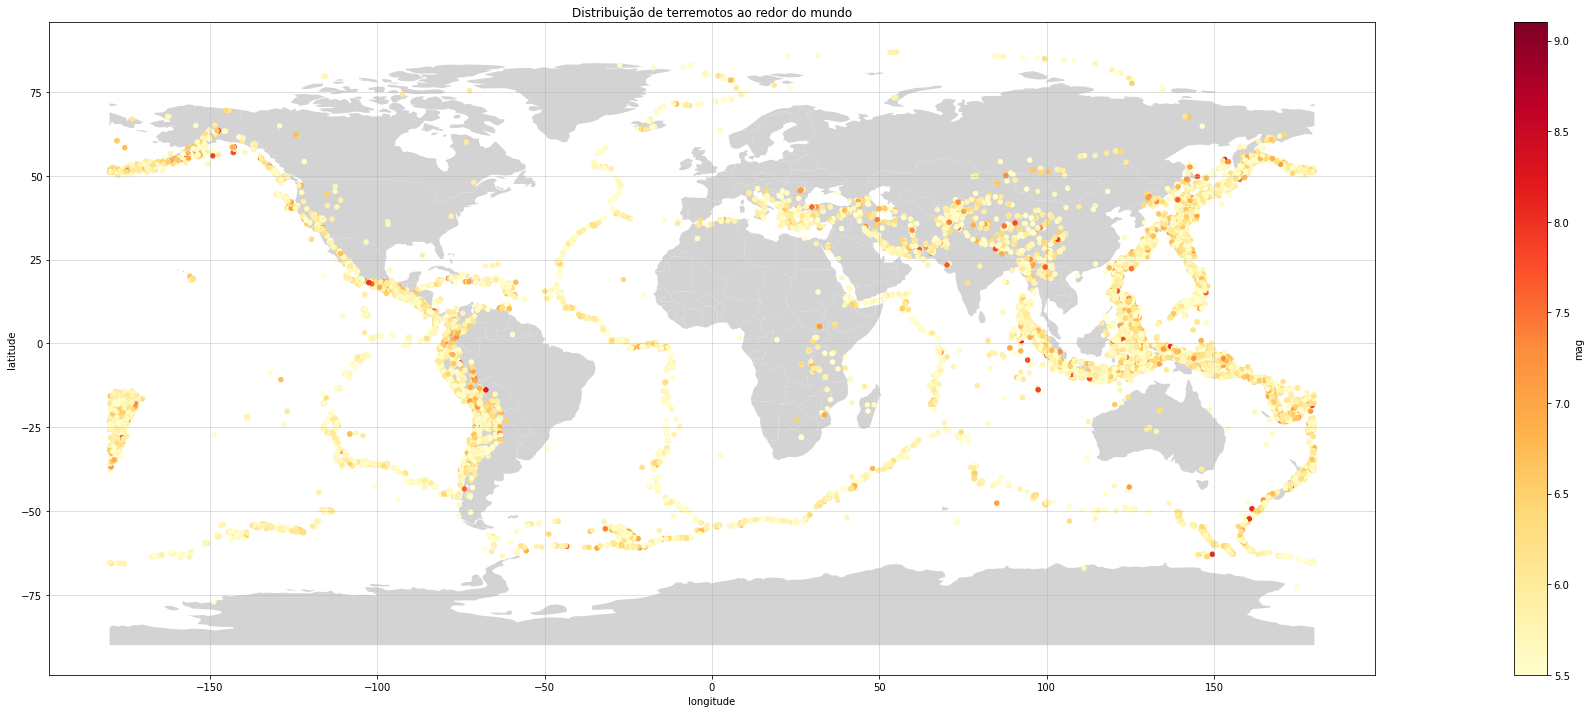

In [11]:
fig, ax = plt.subplots(figsize=(50,12))

countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey",ax=ax)


df_sismos.plot(x="longitude", y="latitude", kind="scatter", c="mag",
        colormap="YlOrRd", title="Distribuição de terremotos ao redor do mundo",ax=ax)

ax.grid(b=True, alpha=0.5)
plt.show()

> A distribuição de terremotos ao redor do mundo é influenciada pela tectônica de placas e pela interação entre as placas tectônicas. As zonas de alta atividade sísmica estão localizadas nas bordas das placas tectônicas, enquanto as zonas de baixa atividade sísmica estão localizadas no interior dos continentes e nos oceanos.

## TOP-10 regiões com maior atividade sísmica 

In [12]:
df_sismos_place = df_sismos.groupby(['place']).count().reset_index()[['place','mag']].rename(columns={"mag": "total"})
df_sismos_place.sort_values(by='total', ascending=False, inplace=True)

In [13]:
# Filtragem para busca das regiões com maior volume
list_most_common = df_sismos_place.head(10)['place'].to_list()
df_sismos_top10 = df_sismos[df_sismos['place'].isin(list_most_common)]

In [14]:
fig = px.bar(df_sismos_place.head(10),
                x=df_sismos_place.head(10)['place'],
                y=df_sismos_place.head(10)['total'],
                text_auto=True,                         
                )
fig.update_layout(
        title='TOP 10 regiões que mais concentram terremotos',
        xaxis_title="Regiões",
        yaxis_title="Total Tremores",
        title_x=0.5,
        )

fig.show()

> A região que mais concentrou tremores no período analisado foi Ilhas Sandwich do Sul. A atividade sísmica nessa região é causada pela subducção da placa de Scotia sob a placa de Sandwich, que é uma placa tectônica menor que se move em direção ao leste. Essa subducção gera um grande estresse na crosta terrestre, o que leva a terremotos frequentes.

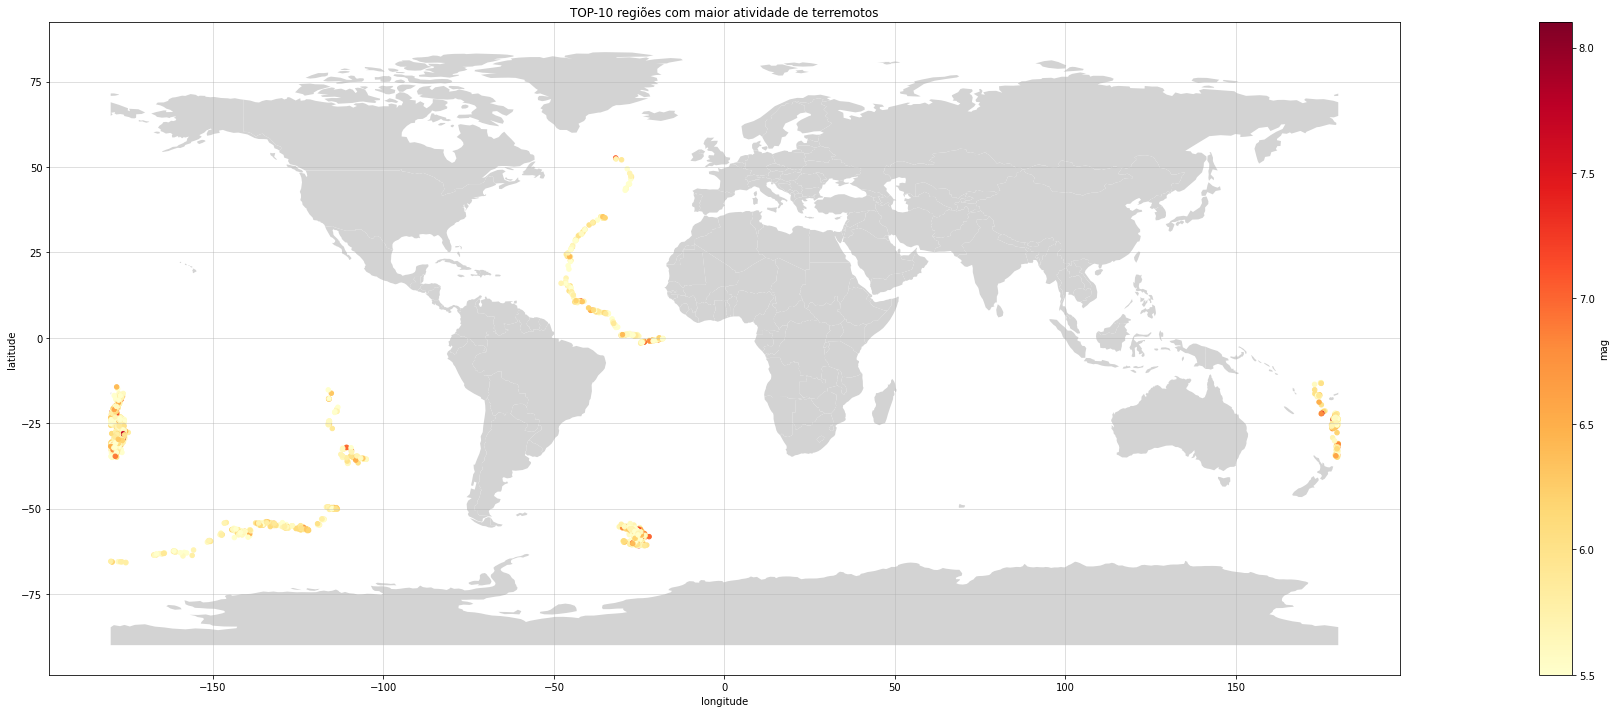

In [15]:
fig, ax = plt.subplots(figsize=(50,12))

countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey",ax=ax)

df_sismos_top10.plot(x="longitude", y="latitude", kind="scatter", c="mag",
                     title="TOP-10 regiões com maior atividade de terremotos",
        colormap="YlOrRd", 
        ax=ax)

ax.grid(b=True, alpha=0.5)
plt.show()

## Distribuição de terremotos ao redor do mundo por profundidade

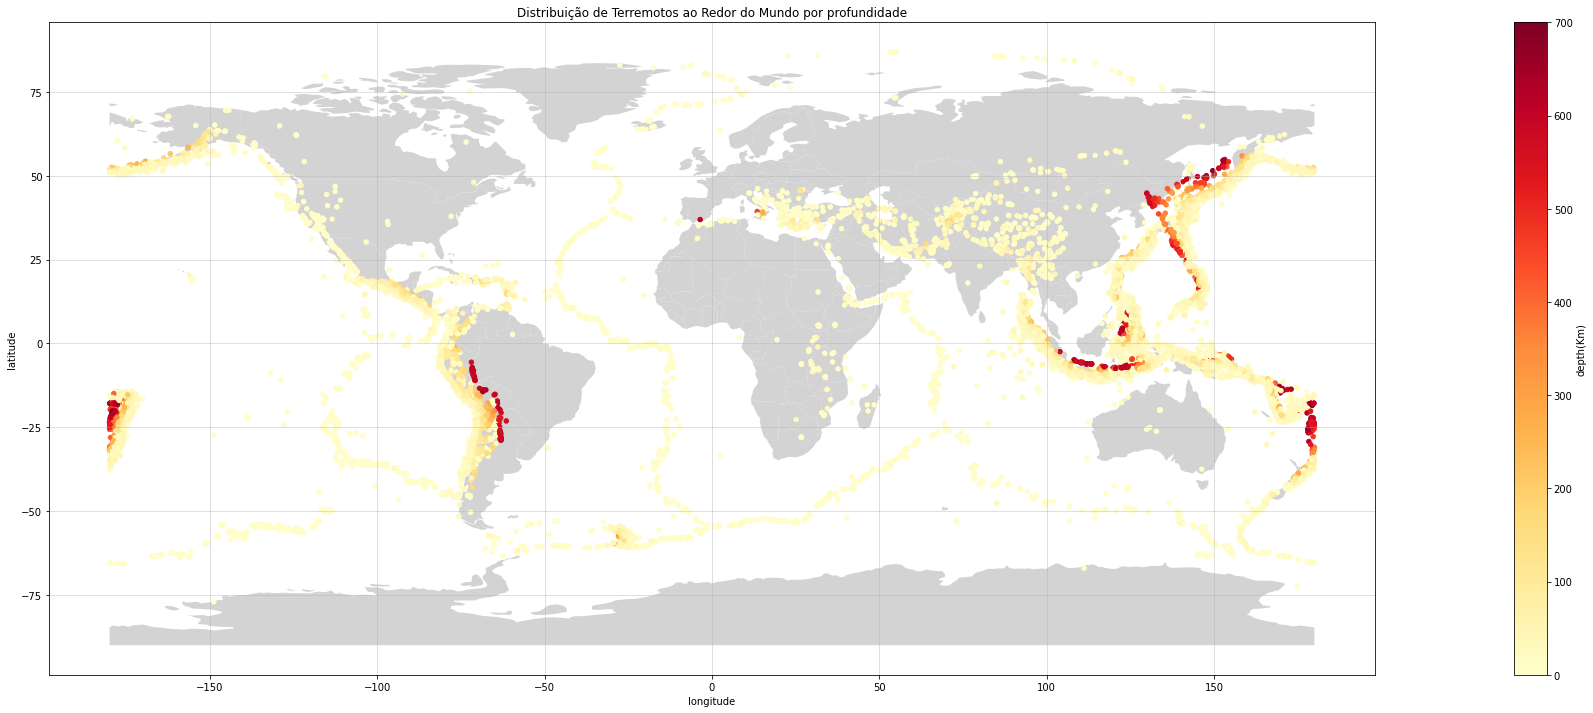

In [16]:
fig, ax = plt.subplots(figsize=(50,12))

countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))

countries.plot(color="lightgrey",ax=ax)

df_sismos.plot(x="longitude", y="latitude", kind="scatter", c="depth(Km)",
               title="Distribuição de Terremotos ao Redor do Mundo por profundidade",
        colormap="YlOrRd", 
        ax=ax)

ax.grid(b=True, alpha=0.5)
plt.show()

> Os terremotos mais profundos (acima de 400 Km) estão concentrados em locais específicos, sendo os principais motivos para esse tipo de comportamento:

1. **Subducção de placas**: A subducção de placas tectônicas pode gerar terremotos profundos, pois a placa que está sendo subduzida pode se quebrar ou se deformar, liberando energia sísmica.
2. **Deformação do manto**: O manto é uma camada quente e viscosa que se estende desde a base da crosta terrestre até uma profundidade de cerca de 2.900 km. A deformação do manto pode gerar terremotos profundos, pois a rocha do manto pode se quebrar ou se deformar, liberando energia sísmica.
3. **Fases de transformação**: O manto é composto por diferentes fases de minerais, que se transformam em diferentes condições de pressão e temperatura. Essas transformações podem gerar terremotos profundos, pois elas podem liberar energia sísmica.
4. **Ciclos de convecção**: O manto é caracterizado por ciclos de convecção, que são movimentos de rocha quente que se elevam desde a base do manto até a superfície. Esses ciclos de convecção podem gerar terremotos profundos, pois eles podem liberar energia sísmica.
5. **Desidratação do manto**: A desidratação do manto pode gerar terremotos profundos, pois a perda de água pode causar a quebra ou a deformação da rocha do manto, liberando energia sísmica.



# Conclusões

* Na série analisada (1985 a 2021), o ano de 2011 concentrou o maior volume de terremotos. Esse comportamento é em grande parte devido ao conjunto de abalos que afetou a região de Fukushima (JP); 

* A magnitude média no período foi de 5.8, com dois anos apresentando registros acima de 9 (2004 e 2011). No ano de 2004 ocorreu no dia 26 de Dezembro, conjunto de tremores responsável pelo tsunami que impactou a costa do pacífico. O segundo, no ano de 2011, corresponde ao evento sitado anteriormente que aconteceu no dia 11 de Março e atingiu a região de Fukushima (JP);

* Terremotos mais profundos tendem a ter magnitude menor, enquanto terremotos mais rasos tendem a ter magnitude maior. Isso ocorre porque a energia liberada durante um terremoto é absorvida pela crosta terrestre à medida que ela se propaga para a superfície. Quanto mais profundo o terremoto, mais energia é absorvida, resultando em uma magnitude menor;

* A distribuição de terremotos ao redor do mundo é influenciada pela tectônica de placas e pela interação entre as placas tectônicas;

* As regiões das Ilhas Sandwich do Sul e Pacífico concentram o maior volume de tremores;

* O maior volume de abalos sísmicos ocorre em profundidades abaixo de 100 Km.

